In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lambda =1.0, w,time,J [-0.03000199  1.69580438  1.25140113] 9999 2.2443790612033245
lambda =0.0, w,time,J [0.86165003 4.60701185 2.5090499 ] 9999 0.37825097190505697
lambda =0.0 alternate err cal, w,time,J [0.86165003 4.60701185 2.5090499 ] 9999 0.37825097692022297


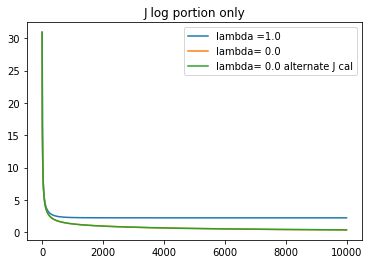

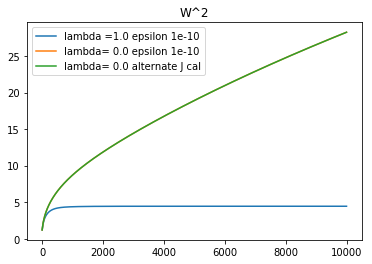

In [48]:
N=100
D=2

X=np.random.randn(N,D)
X[:50,:]=X[:50,:]-2*np.ones((50,D))
X[50:,:]=X[50:,:]+2*np.ones((50,D))

T_target=np.random.randn(N)
T_target[:50]=0
T_target[50:]=1      # another way T=np.array([0]*50+[1]*50)    shape(100,)  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
Xn=np.concatenate((np.ones((100,1)),X),axis=1)                  #if do N,1 is (100,1), Y_predict is (100,)

w=(np.random.randn(D+1))
z=np.dot(Xn,w)
epsilon=1e-10
iteration=10000
wbackup=w

def sigmoid(z):
    return 1/(1+np.exp(-z))


alpha=0.001    # learning rate
lambda_=1

Y_n=sigmoid(z)

def cross_entropy_err(Yp,t):
    
    Err=(-1.0*(t*np.log(Yp+epsilon)+(1.0-t)*np.log(1-Yp+epsilon)))
    return np.sum(Err)

def cross_entropy_err2(Yp,t):
    Err=0
    for i in range(N):
        if (t[i]==1):
            Err=Err+(-1.0*(t[i]*np.log(Yp[i]+epsilon)))
        if (t[i]==0):
            Err=Err+(-1.0*((1.0-t[i])*np.log(1-Yp[i])))            
    return Err


j_cost_lambda=[]
j_cost=[]
j_cost2=[]
w_mag=[]
w_1_mag=[]
w_2_mag=[]

for time in range(iteration):

    derivative=np.dot(Xn.T,(T_target-Y_n))-lambda_*w           #keep the weights from overgrowing to make maximum liklihood maximum
    w=w+alpha*derivative                                    #using lambda*w make maximum posterior not liklihood
    Y_n=sigmoid(np.dot(Xn,w))
    
    if (time%1==0):
        #print(w,time)
        #print(time,cross_entropy_err(Y_n,T_target))
        j_cost_lambda.append(cross_entropy_err(Y_n,T_target))
        w_mag.append(np.dot(w.T,w))
#   
print('lambda =1.0, w,time,J',w,time,cross_entropy_err(Y_n,T_target))
w=wbackup   #start from same random variable
z=np.dot(Xn,w)
Y_n=sigmoid(z)

for time in range(iteration):

    derivative=np.dot(Xn.T,(T_target-Y_n))            #keep the weights from overgrowing to make maximum liklihood maximum
    w=w+alpha*derivative                              #using lambda*w make maximum posterior not liklihood -lambda*w make the convergance faster
    Y_n=sigmoid(np.dot(Xn,w))
    
    if (time%1==0):

        j_cost.append(cross_entropy_err(Y_n,T_target))
        w_1_mag.append(np.dot(w.T,w))

print('lambda =0.0, w,time,J',w,time,cross_entropy_err(Y_n,T_target))

w=wbackup   #start from same random variable
z=np.dot(Xn,w)
Y_n=sigmoid(z)

for time in range(iteration):

    derivative=np.dot(Xn.T,(T_target-Y_n))            #keep the weights from overgrowing to make maximum liklihood maximum
    w=w+alpha*derivative                      #using lambda*w make maximum posterior not liklihood -lambda*w make the convergance faster
    Y_n=sigmoid(np.dot(Xn,w))
    
    if (time%1==0):

        j_cost2.append(cross_entropy_err2(Y_n,T_target))
        w_2_mag.append(np.dot(w.T,w))

print('lambda =0.0 alternate err cal, w,time,J',w,time,cross_entropy_err2(Y_n,T_target))

plt.plot(j_cost_lambda,label='lambda =1.0')
plt.plot(j_cost,label='lambda= 0.0')
plt.plot(j_cost2,label='lambda= 0.0 alternate J cal')
plt.legend()
plt.title('J log portion only')
plt.show()

plt.plot(w_mag,label='lambda =1.0 epsilon 1e-10')
plt.plot(w_1_mag,label='lambda= 0.0 epsilon 1e-10')
plt.plot(w_2_mag,label='lambda= 0.0 alternate J cal')
plt.legend()
plt.title('W^2')
plt.show()

In [17]:
np.shape(derivative)

(3,)

In [106]:
np.log(1e-10)

-23.025850929940457

In [97]:
Y_n

array([5.79293261e-13, 2.44053408e-05, 1.97218993e-15, 2.81113667e-07,
       1.17836629e-13, 2.14209744e-14, 5.10249829e-19, 4.38973578e-10,
       1.40809128e-24, 3.17520579e-14, 1.01929414e-13, 2.10425635e-10,
       7.25964082e-20, 6.37565535e-14, 3.07495092e-17, 1.26670704e-15,
       1.24367952e-13, 2.34368294e-12, 6.06663060e-18, 6.45511921e-10,
       1.03606886e-09, 7.20219863e-13, 2.21006942e-18, 5.84336089e-07,
       1.75789071e-15, 5.90700801e-10, 2.14601944e-02, 5.50584671e-16,
       2.62326315e-20, 4.16264192e-16, 6.53779270e-11, 1.26736858e-12,
       1.61494654e-08, 1.11231588e-07, 2.16272708e-17, 2.50786766e-07,
       9.15778608e-14, 2.42368551e-15, 2.29197657e-14, 1.36419648e-18,
       2.37826561e-18, 1.65096671e-15, 1.74045436e-12, 1.29257580e-20,
       1.32689703e-12, 1.12443100e-24, 6.83022271e-08, 8.17804989e-21,
       5.26669406e-04, 1.37260051e-14, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99999135e-01,
      

In [1]:
N=100
range(N)

range(0, 100)